In [1]:
import sys
sys.path.append("C:/Users/user/PycharmProjects/deeplearning_torch")

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torch import from_numpy
from network import NeuralNetwork
from preprocessor import create_dataset
import numpy as np
import torch.utils.data as data

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

model = NeuralNetwork().double().to(device)

Using cuda device


In [4]:
transform = None
target_transform = None

In [5]:
train_set = create_dataset(train=True)
test_set = create_dataset(train=False)
batch_size = 64

In [6]:
train_set_size = int(len(train_set) *0.8)
valid_set_size = len(train_set) - train_set_size
train_set, valid_set = data.random_split(
    train_set, [train_set_size, valid_set_size])

In [7]:
train_dataloader = DataLoader(
    train_set, batch_size=batch_size, drop_last=True)
valid_dataloader = DataLoader(
    valid_set, batch_size=batch_size, drop_last=True)
test_dataloader = DataLoader(
    test_set, batch_size=batch_size, drop_last=True)

In [8]:
train_accuracies = []
valid_accuracies = []
train_losses = []
valid_losses = []

In [9]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    train_loss, correct = 0, 0
    model.train()
    
    for X, y in dataloader:
        X, y = X.double().to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    train_loss /= len(dataloader)
    accuracy = 100 * correct / size
    train_accuracies.append(accuracy)
    train_losses.append(train_loss)
    print(f"Train Loss: {train_loss:>8f}, Accuracy: {accuracy:>0.2f}%")

def valid_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    valid_loss, correct = 0, 0
    model.eval()
    
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.double().to(device), y.to(device)
            pred = model(X)
            valid_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    valid_loss /= len(dataloader)
    accuracy = 100 * correct / size
    valid_accuracies.append(accuracy)
    valid_losses.append(valid_loss)
    print(f"Valid Loss: {valid_loss:>8f}, Accuracy: {accuracy:>0.2f}%")

In [10]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    accuracy = 100*correct
    print(f"Test Error: \n Accuracy: {(accuracy):>0.1f}%, Avg loss: \
    {test_loss:>8f}")

In [11]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
best_valid_accuracy = 0.00
# best_valid_loss = 10
counter = 0


epochs = 500
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    valid_loop(valid_dataloader, model, loss_fn)

Epoch 1
-------------------------------
Train Loss: 1.753637, Accuracy: 17.94%
Valid Loss: 1.701358, Accuracy: 26.72%
Epoch 2
-------------------------------
Train Loss: 1.598815, Accuracy: 28.65%
Valid Loss: 1.514444, Accuracy: 33.92%
Epoch 3
-------------------------------
Train Loss: 1.472344, Accuracy: 33.34%
Valid Loss: 1.434331, Accuracy: 36.30%
Epoch 4
-------------------------------
Train Loss: 1.410327, Accuracy: 35.18%
Valid Loss: 1.383823, Accuracy: 37.93%
Epoch 5
-------------------------------
Train Loss: 1.366123, Accuracy: 36.30%
Valid Loss: 1.339990, Accuracy: 39.02%
Epoch 6
-------------------------------
Train Loss: 1.324461, Accuracy: 37.70%
Valid Loss: 1.299126, Accuracy: 41.33%
Epoch 7
-------------------------------
Train Loss: 1.285468, Accuracy: 37.99%
Valid Loss: 1.258568, Accuracy: 43.64%
Epoch 8
-------------------------------
Train Loss: 1.243712, Accuracy: 42.14%
Valid Loss: 1.212476, Accuracy: 46.43%
Epoch 9
-------------------------------
Train Loss: 1.19

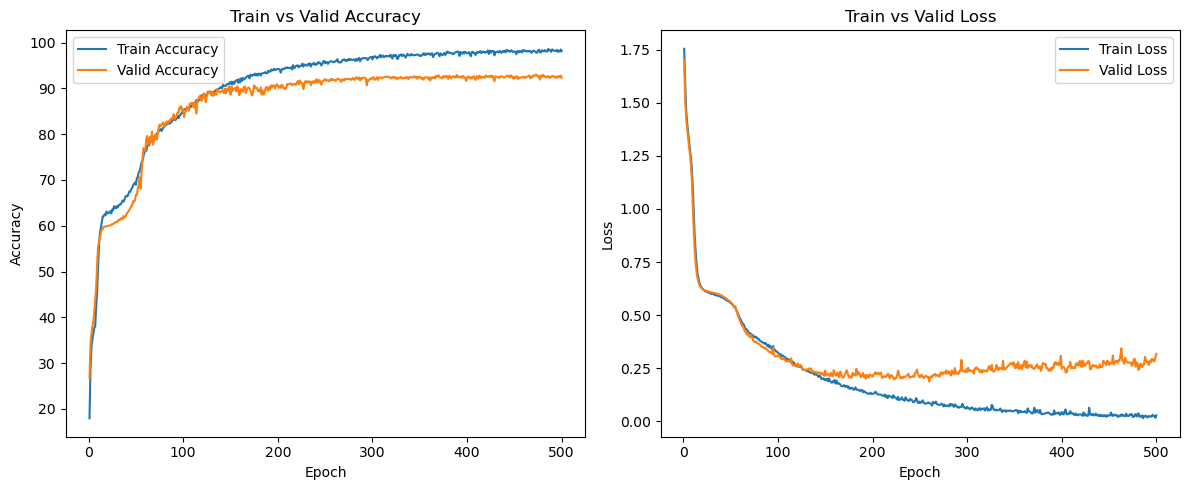

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), valid_accuracies, label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Valid Accuracy')
plt.legend()

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), valid_losses, label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Valid Loss')
plt.legend()

plt.tight_layout()
plt.show()